# Feature Scaling

In [3]:
import numpy as np, pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler

In [53]:
iris=pd.read_csv("irisdata.csv")
set(iris.Species)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [54]:
iris

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
X=iris.iloc[:,:-1]
pd.DataFrame(X).describe().loc[['mean','std','min','max']].columns

Index(['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'], dtype='object')

In [11]:
# Apply MinMax scaling
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
pd.DataFrame(X_minmax).describe().loc[['mean','std','min','max']]

,0,1,2,3
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [19]:
# Apply StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
pd.DataFrame(X_standard).describe().loc[['mean','std','min','max']].round(4)

,0,1,2,3
mean,-0.0000,-0.0000,0.0000,-0.0000
std,1.0034,1.0034,1.0034,1.0034
min,-1.8700,-2.4390,-1.5687,-1.4444
max,2.4920,3.1147,1.7863,1.7109


In [20]:
# Apply Normalizer
scaler = Normalizer()
X_normalized = scaler.fit_transform(X)
pd.DataFrame(X_normalized).describe().loc[['mean','std','min','max']].round(4)

,0,1,2,3
mean,0.7516,0.4048,0.4550,0.1410
std,0.0446,0.1051,0.1597,0.0781
min,0.6539,0.2384,0.1678,0.0147
max,0.8609,0.6071,0.6370,0.2804


In [60]:
# Apply Robust scaling
scaler = RobustScaler()
X_robust = scaler.fit_transform(X)
pd.DataFrame(X_robust).describe().loc[['mean','std','min','max']].round(4)

,0,1,2,3
mean,0.0333,0.1080,-0.1690,-0.0676
std,0.6370,0.8672,0.5041,0.5088
min,-1.1538,-2.0000,-0.9571,-0.8000
max,1.6154,2.8000,0.7286,0.8000


# Discretization

Discretization is a type of feature scaling that involves transforming continuous variables into categorical ones. One way to discretize continuous variables is to use binning, which involves dividing the range of a variable into intervals or bins.

Here are three common types of binning methods:

- Equal Width Binning: This method divides the range of a variable into a fixed number of intervals, each with the same width.

- Equal Frequency Binning: This method divides the observations into intervals that contain approximately the same number of observations.

- K-means Binning: This method uses the k-means algorithm to divide the observations into k intervals, where k is a user-defined parameter.

Here's an example of how to use these binning methods in Python:

In [37]:
X['Sepal_length'].values.reshape(-1, )

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [59]:
from sklearn.preprocessing import KBinsDiscretizer
# Initialize KBinsDiscretizer with 5 bins and the 'quantile' strategy
discretizer = KBinsDiscretizer(n_bins=5, strategy='quantile')

# Fit and transform the data
X_binned = discretizer.fit_transform(X['Sepal_length'].values.reshape(-1,1))

# Print the binned data
print(X_binned[:100])

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 2)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 0)	1.0
  :	:
  (75, 4)	1.0
  (76, 4)	1.0
  (77, 4)	1.0
  (78, 2)	1.0
  (79, 2)	1.0
  (80, 1)	1.0
  (81, 1)	1.0
  (82, 2)	1.0
  (83, 2)	1.0
  (84, 1)	1.0
  (85, 2)	1.0
  (86, 4)	1.0
  (87, 3)	1.0
  (88, 2)	1.0
  (89, 1)	1.0
  (90, 1)	1.0
  (91, 3)	1.0
  (92, 2)	1.0
  (93, 1)	1.0
  (94, 2)	1.0
  (95, 2)	1.0
  (96, 2)	1.0
  (97, 3)	1.0
  (98, 1)	1.0
  (99, 2)	1.0


In [49]:
print(X_binned[:10])

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0


In [169]:
sampledata = pd.DataFrame({'A': np.random.normal(0, 1, 100)})
sampledata['A_binned'] = pd.cut(sampledata['A'], 5, labels=False)
sampledata[:5]

,A,A_binned
0,-0.700232,1
1,0.947235,3
2,-1.157644,1
3,0.938526,3
4,-1.791459,0


In [171]:
data = pd.DataFrame({'A': np.random.normal(0, 1, 100)})
data['A_binned'] = pd.qcut(data['A'], 5, labels=False)
data.head()

,A,A_binned
0,0.777220,3
1,-1.612469,0
2,1.716547,4
3,0.826012,3
4,-0.131053,2


In [175]:
import pandas as pd
from sklearn.cluster import KMeans

# Create a Pandas dataframe with some sample data
data = {'A': [1, 2, 9, 4, 5, 2, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# Define the number of clusters (K)
K = 3

# Perform K-means binning on column 'A'
kmeans = KMeans(n_clusters=K, random_state=0).fit(df[['A']])
df['A_bins'] = kmeans.labels_

# Print the resulting binned data
print(df.T)

        0  1  2  3  4  5  6  7  8   9
A       1  2  9  4  5  2  7  8  9  10
A_bins  1  1  0  2  2  1  0  0  0   0


In [165]:
dict5={'A': np.random.normal(0, 1, 100)}
pd.DataFrame(dict5)

,A
0,1.438852
1,1.660491
2,1.242794
3,0.533262
4,2.247981
...,...
95,0.548731
96,0.939457
97,-0.092304
98,-2.474797


In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

# Create a sample dataset
data = pd.DataFrame({'age': [23, 35, 42, 54, 65, 71, 87], 
                     'income': [50000, 75000, 90000, 110000, 130000, 150000, 175000]})
data

,age,income
0,23,50000
1,35,75000
2,42,90000
3,54,110000
4,65,130000
5,71,150000
6,87,175000


In [43]:
# Apply equal width binning to age
bins = np.linspace(data['age'].min()-1, data['age'].max()+1, 5)
data['age_bin_width'] = pd.cut(data['age'], bins, labels=False)
data

,age,income,age_bin_width
0,23,50000,0
1,35,75000,0
2,42,90000,1
3,54,110000,1
4,65,130000,2
5,71,150000,2
6,87,175000,3


In [44]:
# Apply equal frequency binning to income
data['income_bin_freq'] = pd.qcut(data['income'], q=3, labels=False)
data

,age,income,age_bin_width,income_bin_freq
0,23,50000,0,0
1,35,75000,0,0
2,42,90000,1,0
3,54,110000,1,1
4,65,130000,2,1
5,71,150000,2,2
6,87,175000,3,2


In [45]:
# Apply k-means binning to income
kmeans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data['income_bin_kmeans'] = kmeans.fit_transform(data[['income']])
data

,age,income,age_bin_width,income_bin_freq,income_bin_kmeans
0,23,50000,0,0,0.0
1,35,75000,0,0,0.0
2,42,90000,1,0,0.0
3,54,110000,1,1,1.0
4,65,130000,2,1,1.0
5,71,150000,2,2,2.0
6,87,175000,3,2,2.0


In this example, we first create a sample dataset with two continuous variables: age and income.

We then apply three different binning methods to these variables. For `age`, we apply equal width binning using `pd.cut()` method and set the number of bins to 4. For `income`, we apply equal frequency binning using `pd.qcut()` method with 3 bins, and k-means binning using the `KBinsDiscretizer` class from `scikit-learn`.

Finally, we print the transformed dataset with the newly added binned columns (`age_bin_width`, `income_bin_freq`, and `income_bin_kmeans`).

## Discretization is necessary for several reasons:

- **Simplification**: Discretization simplifies the data by converting continuous variables into categorical ones, which reduces the complexity of the data.

- **Handling non-linearity**: Some machine learning algorithms assume that the data is linearly related, but if the relationship is non-linear, then discretization can help capture the non-linear relationship.

- **Improving interpretability**: Discretization can make the data more interpretable by providing meaningful categories that are easy to understand and analyze.

- **Reducing noise**: Discretization can also help reduce the noise in the data by aggregating the observations into categories.

- **Addressing sparsity**: Discretization can also help address sparsity in the data by grouping rare values into a separate category, which can improve the performance of some machine learning algorithms.

Overall, discretization is a useful technique for preparing data for machine learning algorithms, especially when dealing with complex or non-linear relationships, improving interpretability, and reducing noise or sparsity.

# Feature encoding

Feature encoding is the process of converting categorical variables into numerical ones that can be used by machine learning algorithms. Here are some common encoding methods:

- **One-Hot Encoding**: This method creates a new binary variable for each category in a categorical variable. For example, if a variable has categories A, B, and C, then one-hot encoding would create three binary variables: A=1, B=1, C=1, and all other variables set to 0.

- **Ordinal Encoding**: This method assigns a unique integer to each category in a categorical variable. The integers are assigned based on the order of the categories, so that the lowest integer is assigned to the first category, the second lowest to the second category, and so on.

- **Count/Frequency Encoding**: This method replaces each category in a categorical variable with the number of times it appears in the dataset (count encoding) or the frequency of its occurrence (frequency encoding).

- **Mean Encoding**: This method replaces each category in a categorical variable with the mean value of the target variable for that category.

- **Weight of Evidence (WOE) Encoding**: This method calculates the weight of evidence of each category in a categorical variable. The weight of evidence is the logarithm of the ratio of the proportion of target variables that are positive (i.e., have the outcome of interest) to the proportion that are negative (i.e., do not have the outcome of interest).

Here's an example of how to use these encoding methods in Python:

In [13]:
#!pip install category_encoders

In [189]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import CountEncoder, TargetEncoder, WOEEncoder

# Create a sample dataset
data = pd.DataFrame({'color': ['red', 'green', 'blue', 'red', 'green', 'green', 'blue'],
                     'size': ['small', 'medium', 'large', 'medium', 'small', 'medium', 'large'],
                     'price': [10, 20, 30, 25, 15, 20, 35],
                     'label': [0, 0, 1, 1, 0, 1, 1]})
data

,color,size,price,label
0,red,small,10,0
1,green,medium,20,0
2,blue,large,30,1
3,red,medium,25,1
4,green,small,15,0
5,green,medium,20,1
6,blue,large,35,1


In [179]:
# Apply one-hot encoding to color and size
onehot = OneHotEncoder()
data_onehot = onehot.fit_transform(data[['color']])
print(data['color'])
print(data_onehot.toarray())

0      red
1    green
2     blue
3      red
4    green
5    green
6     blue
Name: color, dtype: object
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [180]:
# Apply ordinal encoding to color and size
ordinal = OrdinalEncoder()
data_ordinal = ordinal.fit_transform(data[['color', 'size']])
print(data[['color', 'size']])
print(data_ordinal)

   color    size
0    red   small
1  green  medium
2   blue   large
3    red  medium
4  green   small
5  green  medium
6   blue   large
[[2. 2.]
 [1. 1.]
 [0. 0.]
 [2. 1.]
 [1. 2.]
 [1. 1.]
 [0. 0.]]


In [181]:
# Apply count/frequency encoding to color
count = CountEncoder()
data_count = count.fit_transform(data['color'])
print(data['color'])
print(data_count)

0      red
1    green
2     blue
3      red
4    green
5    green
6     blue
Name: color, dtype: object
   color
0      2
1      3
2      2
3      2
4      3
5      3
6      2


In [190]:
# Apply mean encoding to color
mean = TargetEncoder()
data_mean = mean.fit_transform(data['color'], data['label'])
print(data[['color','label']])
print(data_mean)

   color  label
0    red      0
1  green      0
2   blue      1
3    red      1
4  green      0
5  green      1
6   blue      1
      color
0  0.519210
1  0.361715
2  0.884739
3  0.519210
4  0.361715
5  0.361715
6  0.884739


In [192]:
# Apply WOE encoding to color
woe = WOEEncoder()
data_woe = woe.fit_transform(data['color'], data['label'])
print(data[['color','label']])
print(data_woe)

   color  label
0    red      0
1  green      0
2   blue      1
3    red      1
4  green      0
5  green      1
6   blue      1
      color
0 -0.182322
1 -0.587787
2  0.916291
3 -0.182322
4 -0.587787
5 -0.587787
6  0.916291


# Feature Transformation

The choice of transformation method depends on the characteristics of the data and the goals of the analysis. Here are some general guidelines for when to use each transformation:

- **Logarithmic Transformation**: Use this method when the feature has a wide range of values and/or is skewed to the right (i.e., has a long tail of high values). This transformation can help to normalize the distribution of the data and reduce the impact of outliers.

- **Reciprocal Transformation**: Use this method when the feature has mostly large values and/or is skewed to the left (i.e., has a long tail of low values). This transformation can help to normalize the distribution of the data and reduce the impact of outliers.

- **Square Root Transformation**: Use this method when the feature has mostly small values and/or is skewed to the right (i.e., has a long tail of high values). This transformation can help to normalize the distribution of the data and reduce the impact of outliers.

- **Exponential Transformation**: Use this method when the feature has a wide range of values and/or is skewed to the left (i.e., has a long tail of low values). This transformation can help to normalize the distribution of the data and reduce the impact of outliers.

- **Box-Cox Transformation**: Use this method when the feature has a non-normal distribution and/or the variance is not constant across the range of values. This transformation can help to normalize the distribution of the data and make it more suitable for parametric statistical tests.

- **Quintile Transformation**: Use this method when the goal is to convert a numerical feature into a categorical variable with equal frequency bins. This transformation can be useful for certain machine learning algorithms that work better with categorical data.

It's important to note that these guidelines are not strict rules and that the choice of transformation method may depend on the specific characteristics of the data and the goals of the analysis. It's always a good idea to experiment with different transformation methods and evaluate their effects on the data before making a final decision.

In [64]:
from scipy.stats import boxcox
from sklearn.preprocessing import QuantileTransformer

In [65]:
# Create a sample dataset
data = pd.DataFrame({'age': [20, 25, 30, 35, 40, 45, 50],
                     'income': [20000, 30000, 40000, 50000, 60000, 70000, 80000],
                     'weight': [50, 60, 70, 80, 90, 100, 110]})
data

,age,income,weight
0,20,20000,50
1,25,30000,60
2,30,40000,70
3,35,50000,80
4,40,60000,90
5,45,70000,100
6,50,80000,110


In [67]:
# Apply logarithmic transformation to income
data['income_log'] = np.log(data['income'])

In [68]:
# Apply reciprocal transformation to weight
data['weight_reciprocal'] = 1 / data['weight']
data

,age,income,weight,income_log,weight_reciprocal
0,20,20000,50,9.903488,0.020000
1,25,30000,60,10.308953,0.016667
2,30,40000,70,10.596635,0.014286
3,35,50000,80,10.819778,0.012500
4,40,60000,90,11.002100,0.011111
5,45,70000,100,11.156251,0.010000
6,50,80000,110,11.289782,0.009091


In [69]:
# Apply square root transformation to age
data['age_sqrt'] = np.sqrt(data['age'])
data

,age,income,weight,income_log,weight_reciprocal,age_sqrt
0,20,20000,50,9.903488,0.020000,4.472136
1,25,30000,60,10.308953,0.016667,5.000000
2,30,40000,70,10.596635,0.014286,5.477226
3,35,50000,80,10.819778,0.012500,5.916080
4,40,60000,90,11.002100,0.011111,6.324555
5,45,70000,100,11.156251,0.010000,6.708204
6,50,80000,110,11.289782,0.009091,7.071068


In [70]:
# Apply exponential transformation to income
data['weight_exp'] = np.exp(data['weight'])
data

,age,income,weight,income_log,weight_reciprocal,age_sqrt,weight_exp
0,20,20000,50,9.903488,0.020000,4.472136,5.184706e+21
1,25,30000,60,10.308953,0.016667,5.000000,1.142007e+26
2,30,40000,70,10.596635,0.014286,5.477226,2.515439e+30
3,35,50000,80,10.819778,0.012500,5.916080,5.540622e+34
4,40,60000,90,11.002100,0.011111,6.324555,1.220403e+39
5,45,70000,100,11.156251,0.010000,6.708204,2.688117e+43
6,50,80000,110,11.289782,0.009091,7.071068,5.920972e+47


In [73]:
# Apply Box-Cox transformation to income
data['income_boxcox'],_ = boxcox(data['income'])
data

,age,income,weight,income_log,weight_reciprocal,age_sqrt,weight_exp,income_boxcox
0,20,20000,50,9.903488,0.020000,4.472136,5.184706e+21,1750.358795
1,25,30000,60,10.308953,0.016667,5.000000,1.142007e+26,2345.273055
2,30,40000,70,10.596635,0.014286,5.477226,2.515439e+30,2886.254577
3,35,50000,80,10.819778,0.012500,5.916080,5.540622e+34,3390.371554
4,40,60000,90,11.002100,0.011111,6.324555,1.220403e+39,3866.932963
5,45,70000,100,11.156251,0.010000,6.708204,2.688117e+43,4321.736118
6,50,80000,110,11.289782,0.009091,7.071068,5.920972e+47,4758.706655


In [74]:
# Apply quintile transformation to age
quantile = QuantileTransformer(n_quantiles=5)
data['age_quantile'] = quantile.fit_transform(data[['age']])
data

,age,income,weight,income_log,weight_reciprocal,age_sqrt,weight_exp,income_boxcox,age_quantile
0,20,20000,50,9.903488,0.020000,4.472136,5.184706e+21,1750.358795,0.000000
1,25,30000,60,10.308953,0.016667,5.000000,1.142007e+26,2345.273055,0.166667
2,30,40000,70,10.596635,0.014286,5.477226,2.515439e+30,2886.254577,0.333333
3,35,50000,80,10.819778,0.012500,5.916080,5.540622e+34,3390.371554,0.500000
4,40,60000,90,11.002100,0.011111,6.324555,1.220403e+39,3866.932963,0.666667
5,45,70000,100,11.156251,0.010000,6.708204,2.688117e+43,4321.736118,0.833333
6,50,80000,110,11.289782,0.009091,7.071068,5.920972e+47,4758.706655,1.000000


In [156]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.describe().loc[['mean','std', 'min', 'max']].round(3).to_csv("TP.csv")

In [119]:
mtcars.describe().to_csv("describe.csv")

d:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: 'AxesSubplot' object has no attribute 'show'

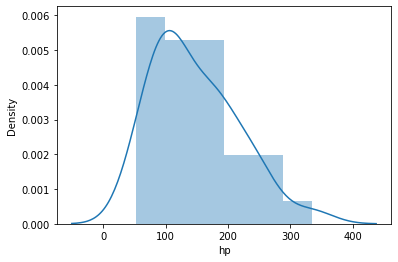

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(mtcars['hp'], kde=True, hist=True).show()

In [122]:
mtcars['log_hp'] = np.log(mtcars['hp'])

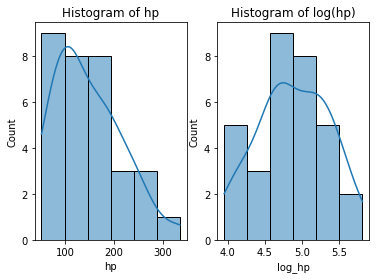

In [124]:
fig, axs = plt.subplots(ncols=2)

sns.histplot(data=mtcars, x='hp', kde=True,ax=axs[0])
axs[0].set_title('Histogram of hp')

sns.histplot(data=mtcars, x='log_hp', kde=True,ax=axs[1])
axs[1].set_title('Histogram of log(hp)')
plt.savefig('logplot.png')
plt.show()

In [129]:
mtcars['recip_disp'] = 1 / mtcars['disp']

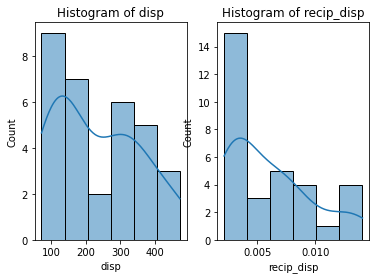

In [130]:
fig, axs = plt.subplots(ncols=2)

sns.histplot(data=mtcars, x='disp', kde=True,ax=axs[0])
axs[0].set_title('Histogram of disp')

sns.histplot(data=mtcars, x='recip_disp', kde=True,ax=axs[1])
axs[1].set_title('Histogram of recip_disp')
plt.savefig('Reciplot.png')
plt.show()

In [131]:
mtcars['sqrt_wt'] = np.sqrt(mtcars['wt'])

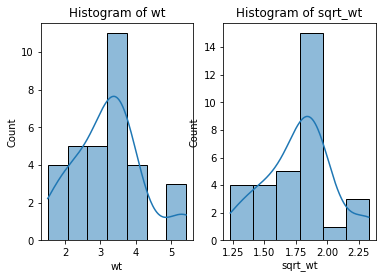

In [132]:
fig, axs = plt.subplots(ncols=2)

sns.histplot(data=mtcars, x='wt', kde=True,ax=axs[0])
axs[0].set_title('Histogram of wt')

sns.histplot(data=mtcars, x='sqrt_wt', kde=True,ax=axs[1])
axs[1].set_title('Histogram of sqrt_wt')
plt.savefig('SQRTplot.png')
plt.show()

In [133]:
mtcars['exp_qsec'] = np.exp(mtcars['qsec'])

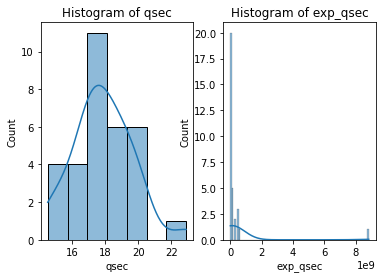

In [134]:
fig, axs = plt.subplots(ncols=2)

sns.histplot(data=mtcars, x='qsec', kde=True,ax=axs[0])
axs[0].set_title('Histogram of qsec')

sns.histplot(data=mtcars, x='exp_qsec', kde=True,ax=axs[1])
axs[1].set_title('Histogram of exp_qsec')
plt.savefig('Expplot.png')
plt.show()

In [135]:
from scipy.stats import boxcox
mtcars['boxcox_mpg'], _ = boxcox(mtcars['mpg'])

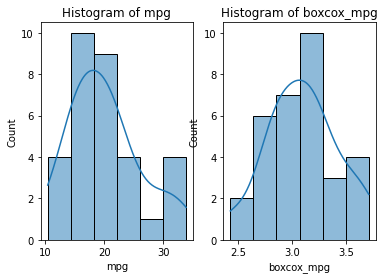

In [136]:
fig, axs = plt.subplots(ncols=2)

sns.histplot(data=mtcars, x='mpg', kde=True,ax=axs[0])
axs[0].set_title('Histogram of mpg')

sns.histplot(data=mtcars, x='boxcox_mpg', kde=True,ax=axs[1])
axs[1].set_title('Histogram of boxcox_mpg')
plt.savefig('BOXCOXplot.png')
plt.show()

In [144]:
mtcars['quintile_mpg'] = pd.qcut(mtcars['mpg'], q=5, labels=False)

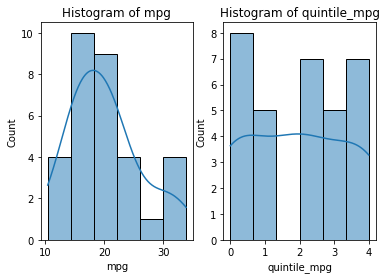

In [145]:
fig, axs = plt.subplots(ncols=2)

sns.histplot(data=mtcars, x='mpg', kde=True,ax=axs[0])
axs[0].set_title('Histogram of mpg')

sns.histplot(data=mtcars, x='quintile_mpg', kde=True,ax=axs[1])
axs[1].set_title('Histogram of quintile_mpg')
plt.savefig('quintileplot.png')
plt.show()